### Importing the Libraries

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Function for Butterworth Low Pass Filter

In [29]:
def apply_butterworth_filter(image, n, D0):
    M, N = image.shape
    H = np.zeros((M, N), dtype=np.float32)
    for u in range(M):
        for v in range(N):
            D = np.sqrt((u - M/2)**2 + (v - N/2)**2)
            H[u, v] = 1 / (1 + (D / D0)**(2 * n))
    
    filtered_image = image * H
    reconstructed_image = np.fft.ifft2(np.fft.ifftshift(filtered_image)).real
    return np.uint8(reconstructed_image)

### Function for Gaussian Low Pass Filter

In [30]:
# def apply_gaussian_low_pass_filter(image, cutoff_freq):
#     height, width = image.shape
#     gaussian = np.zeros((height, width), dtype = np.float32)

#     for u in range(height):
#         for v in range(width):
#             D = np.sqrt((u - height / 2) ** 2 + (v - width / 2) ** 2)
#             gaussian[u, v] = np.exp(-(D ** 2) / (2 * (cutoff_freq ** 2)))

#     filtered_image = image * gaussian
#     reconstructed_image = np.fft.ifft2(np.fft.ifftshift(filtered_image)).real
#     return np.uint8(reconstructed_image)

### Loading the Image

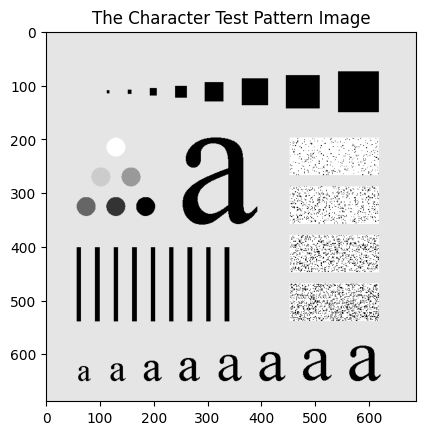

In [31]:
character_pattern_image = cv2.imread("./Images/Fig0445(a) Characters Test Pattern 688x688.tif", 0)
plt.imshow(cv2.cvtColor(character_pattern_image, cv2.COLOR_BGR2RGB))
plt.title("The Character Test Pattern Image")
plt.show()

### Applying Fast Fourier Transform (FFT)

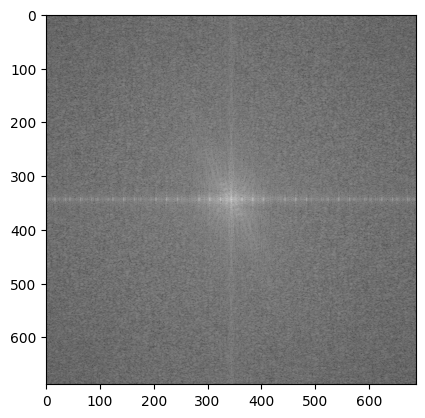

In [32]:
fft_image = np.fft.fftshift(np.fft.fft2(character_pattern_image))
plt.imshow(np.log(np.abs(fft_image)), cmap = 'gray')

### Applying Butterworth Filter

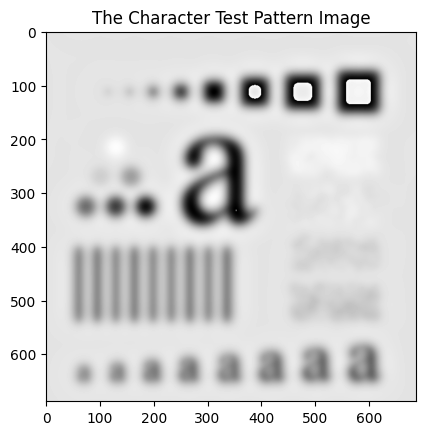

In [33]:
butterworth_filtered_image = apply_butterworth_filter(fft_image, 2, 15)
# plt.imshow(cv2.cvtColor(butterworth_filtered_image, cv2.COLOR_BGR2RGB))
plt.imshow(butterworth_filtered_image, cmap="gray")
plt.title("The Character Test Pattern Image")
plt.show()

### Applying Gaussian Low Pass Filter

In [34]:
# gaussian_filtered_image = apply_gaussian_low_pass_filter(fft_image, 15)
# plt.imshow(cv2.cvtColor(gaussian_filtered_image, cv2.COLOR_BGR2RGB))
# plt.title("The Character Test Pattern Image")
# plt.show()